## Assignment 3 (100 marks)
#### =====================================================================================================
### Deadline: 04/13 11:59 pm
#### =====================================================================================================

### Problem 1: Regression (10 marks)

The dataset `lab03_dataset_1.csv` has the results of fraud investigations of 5,960 cases. For this task, you will use the input features *FRAUD, TOTAL_SPEND, NUM_CLAIMS, MEMBER_DURATION, OPTOM_PRESC, NUM_MEMBERS* to predict the output *DOCTOR_VISITS*.

### 1.a (2 marks)

1. Normalize the entire dataset.
2. Use a train-test split of 80-20.

In [4]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# read in the csv to a pandas dataframe
df1 = pd.read_csv('lab03_dataset_1.csv')

# Normalize the data set using StandardScalar (all data is already numerical)
scaler = StandardScaler().fit(df1)
df1_scaled = pd.DataFrame(scaler.transform(df1))
df1_scaled.columns = ['FRAUD', 'TOTAL_SPEND', 'NUM_CLAIMS', 'MEMBER_DURATION', 'OPTOM_PRESC', 'NUM_MEMBERS','DOCTOR_VISITS']

# Create the train-test split
# Define X & y sets
X = df1_scaled[['FRAUD', 'TOTAL_SPEND', 'NUM_CLAIMS', 'MEMBER_DURATION', 'OPTOM_PRESC', 'NUM_MEMBERS']].to_numpy()
y = df1_scaled['DOCTOR_VISITS'].to_numpy()

# random_state argument shuffles, if = None, shuffles new everytime, if = integer, shuffles to the same set everytime
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)

### 1.b (4 marks)

Use sklearn's `LinearRegression` and `SGDRegressor` models for training and output their mean squared error on the test set. Your MSE should be less 1.0.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Train the data using LR models, will both models have their own MSE
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
# Output the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("LR mean squared error:", mse)

# Train using SGD and ouput mse
sgd = SGDRegressor().fit(X_train, y_train)
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("SGD mean squared error:", mse)

LR mean squared error: 0.9249944638019902
SGD mean squared error: 0.9264560760951014


### 1.c (4 marks)

Use sklearn's `KNeighborsRegressor` model for training and output their mean squared error on the test set. Your MSE should be less 0.9. Feel free to tweak the parameters of neighbors, algorithm, and metric in the `KNeighborsRegressor` function to reach the desired MSE.

In [8]:
from sklearn.neighbors import KNeighborsRegressor

# Train data using KNN and output the MSE (k = 10, default algorithm, and manhattan distance chosen)
knn = KNeighborsRegressor(n_neighbors = 10, metric = 'l1').fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("K-NN mean squared error:", mse)

K-NN mean squared error: 0.8894467931786076


### Problem 2: PCA (20 marks)

`lab03_dataset_2.csv` contains 205 observations on various vehicles. This is an unsupervised training data. You will use the entire dataset for `PCA`.

### 2.a (2 marks)

For the 14 input features, drop any rows with missing numerical values and output the new length of the training dataset.

In [11]:
# Read in the dataset to a dataframe
df2 = pd.read_csv('lab03_dataset_2.csv')
# Delete rows that have a "?"
# df!= ? creates a frame where False is place at ? and True is placed anywhere else
# all() returns False for a row where there is at least 1 False value
# df[boolean_mask] drops all of the False values in the set
df2 = df2[(df2 != '?').all(axis = 1)]
# 205 rows - 10 rows with empty cell(s) = 195
print("New length:", len(df2), "rows")

New length: 195 rows


### 2.b (6 marks)

Using the sklearn's `PCA` method, compute all the principal components (PCs) of the normalized dataset. All the PCs capture a fraction of the total variance, output all the variances captured by all the PCs. Write a code snippet that checks all the PCs and selects the `top k PCs` whose total variance captured is atleast `90%`. What did `k` come out to be?

In [13]:
from sklearn.decomposition import PCA

# Normalize the data using StandardScaler
scaler = StandardScaler().fit(df2)
df2_scaled = pd.DataFrame(scaler.transform(df2))
df2_scaled.columns = [ 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price' ]

# fit the scaled dataset
# Do we need n_components or do we find it from the top k-PCs, don't forget the email
pca = PCA().fit(df2_scaled)
variance_ratio_list = pca.explained_variance_ratio_

k_pca = 0
v_percentage = 0
# Ratio values are already in order
for variance in variance_ratio_list:
    v_percentage += variance
    k_pca += 1
    if v_percentage >= 0.9:
        break

print("From top k-PCs, k =", k_pca)

From top k-PCs, k = 6


### 2.c (3 marks)

Using the `top k PCs`, apply `dimensionality reduction` on the normalized dataset to generate and display the transformed dataset which should now have only `k columns`. Display the output as a DataFrame.

In [15]:
# Retrain and reduce dimension given the 6 components we found from the previous answer
pca = PCA(n_components = 6).fit_transform(df2_scaled)
pca = pd.DataFrame(pca)
pca.columns = [ 'PC1', 'PC2','PC3','PC4','PC5','PC6' ]
pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.612999,-2.164573,0.298752,2.436486,0.194563,0.116741
1,-0.493886,-2.190732,0.248341,2.476630,0.331332,0.157826
2,0.443900,-1.365449,-1.449443,-0.626999,0.359939,2.002387
3,-0.178982,-0.256392,-0.066248,-1.153280,0.277470,-0.118314
4,1.269804,-1.167075,-0.018756,-1.204362,0.048029,0.332126
...,...,...,...,...,...,...
190,2.600083,0.420264,1.077006,-0.461281,0.101035,-1.002321
191,3.448779,-0.236803,1.025905,-0.333152,0.002958,-0.842925
192,3.449740,-0.496868,1.466348,-0.347475,0.868250,-0.062013
193,2.329514,2.962563,-1.129910,-0.613319,2.005477,0.648051


### 2.d (3 marks)

We learned in class that we can also obtain the PCs using a matrix decomposition technique called `SVD:` $X=U\Lambda V$. Use `SVD` on the original normalized dataset to obtain the 3 decomposed matrices and output them.

In [17]:
from scipy import linalg

# Use svd function to return the decomposed matrices and print them in dataframe mode
U, A, V = linalg.svd(df2_scaled)

U = pd.DataFrame(U)
A = pd.DataFrame(A)
V = pd.DataFrame(V)

print(U)
print(A)
print(V.T)

          0         1         2         3         4         5         6    \
0   -0.015995  0.102674  0.019400  0.182944 -0.017855  0.012966  0.063217   
1   -0.012887  0.103915  0.016127  0.185958 -0.030406  0.017530  0.047363   
2    0.011583  0.064769 -0.094122 -0.047078 -0.033031  0.222402 -0.091994   
3   -0.004670  0.012162 -0.004302 -0.086594 -0.025463 -0.013141  0.022138   
4    0.033134  0.055359 -0.001218 -0.090430 -0.004408  0.036889 -0.016175   
..        ...       ...       ...       ...       ...       ...       ...   
190  0.067845 -0.019935  0.069938 -0.034635 -0.009272 -0.111326  0.112815   
191  0.089991  0.011232  0.066619 -0.025015 -0.000271 -0.093622  0.062464   
192  0.090016  0.023568  0.095220 -0.026090 -0.079678 -0.006888  0.068973   
193  0.060785 -0.140526 -0.073373 -0.046051 -0.184040  0.071978  0.070322   
194  0.084474 -0.005425  0.070826 -0.035552 -0.019927 -0.096017  0.088270   

          7         8         9    ...       185       186       187  \
0  

### 2.e (3 marks)

Generate the `k` (obtained from 2.b) largest eigenvalues from the decomposed matrices obtained from the `SVD`. Remember, eigenvalue $\lambda=\Lambda^2/n$

In [19]:
# Find the eigenvalues from computation on matrix A
A = np.array(A)
eig_vs = (A*A)/195

largest_eig_vs = []
# Pick out the largest 6 eigenvalues
for i in range(6):
    largest_eig_vs.append(eig_vs[i][0])

largest_eig_vs

[7.531815528481896,
 2.2792309449565087,
 1.2161330772900891,
 0.9096151933617991,
 0.6089421735508275,
 0.4157043016980552]

### 2.f (3 marks)

Generate the projections of the normalized dataset using the `first k PCs` obtained from the `SVD` and display it inside a DataFrame.

In [21]:
# Take the first 6 columns of transposed v
v = []; k = 0
for i, j in V.T.items():
    v.append(j.to_numpy())
    k += 1
    if k == 6: break

# Multipy to the first 6 columns of the dataset transposed dataset V
pc = pd.DataFrame()
for i in v:
    df = pd.DataFrame(df2_scaled@i)
    pc = pd.concat([pc, df], axis=1)
pc.columns = [ 'PC1', 'PC2','PC3','PC4','PC5','PC6' ]
pc

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.612999,2.164573,0.298752,2.436486,-0.194563,0.116741
1,-0.493886,2.190732,0.248341,2.476630,-0.331332,0.157826
2,0.443900,1.365449,-1.449443,-0.626999,-0.359939,2.002387
3,-0.178982,0.256392,-0.066248,-1.153280,-0.277470,-0.118314
4,1.269804,1.167075,-0.018756,-1.204362,-0.048029,0.332126
...,...,...,...,...,...,...
190,2.600083,-0.420264,1.077006,-0.461281,-0.101035,-1.002321
191,3.448779,0.236803,1.025905,-0.333152,-0.002958,-0.842925
192,3.449740,0.496868,1.466348,-0.347475,-0.868250,-0.062013
193,2.329514,-2.962563,-1.129910,-0.613319,-2.005477,0.648051


### Problem 3: Clustering (30 marks)

`lab03_dataset_3.csv` contains 239 observations with two input features *x1* and *x2*.

`lab03_dataset_4.csv` contains 1440 observations with two input features *x1* and *x2*.

For this task, you will perform various clustering-related operations using the `sklearn clustering` module.

### 3.a (6 marks)

Using `lab03_dataset_3.csv`, apply sklearn's `KMeans` algorithm on the two-dimensional data and output the resulting clusters using a scatterplot. You will apply `KMeans` over several clusters ranging from cluster-count `K = 2 to 6`. Make sure for every iteration of different cluster-count, your scatterplot should use `K colors` to clearly distinguish the data points belonging in their respective `K clusters`. Also, compute the `Silhouette score` for each of those `K clusters` and plot that score against `K`. Label the plot axes accordingly.

Silhouette score: 0.4457081162143957


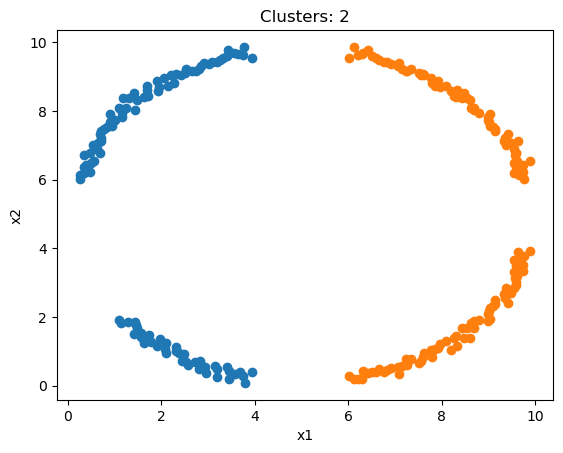

Silhouette score: 0.5781924238958424


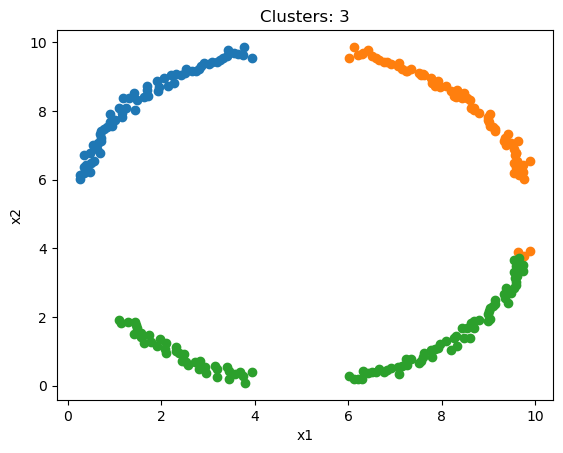

Silhouette score: 0.6778975743295703


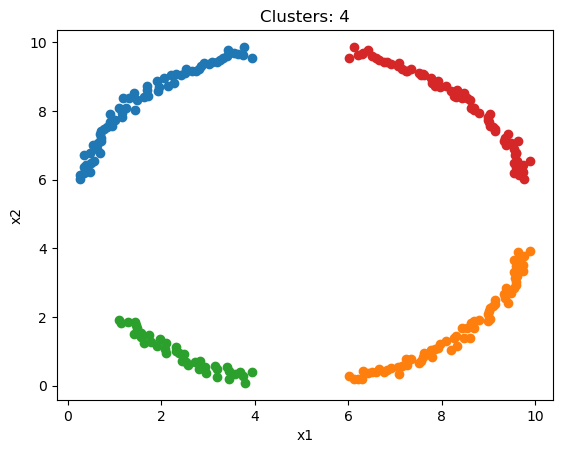

Silhouette score: 0.6389432396917661


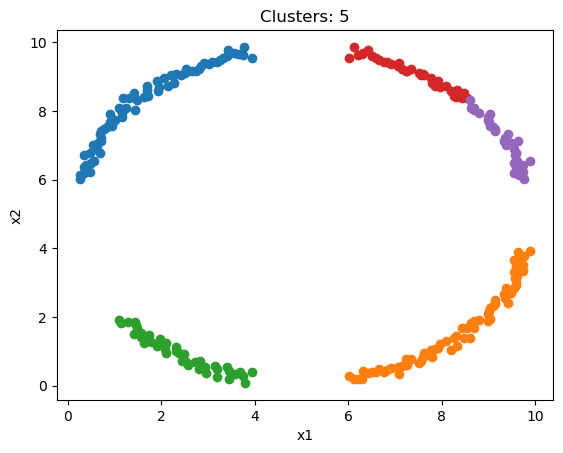

Silhouette score: 0.6261161860343141


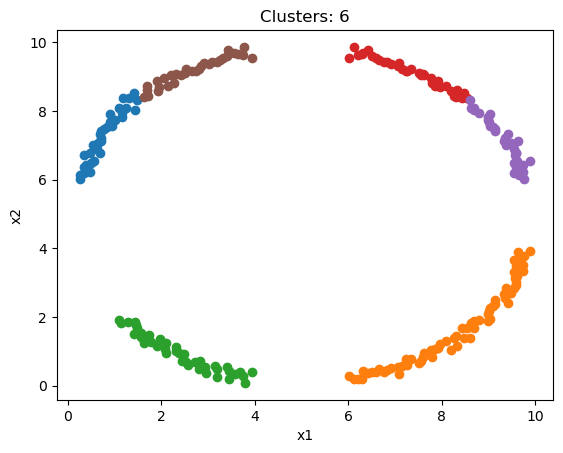

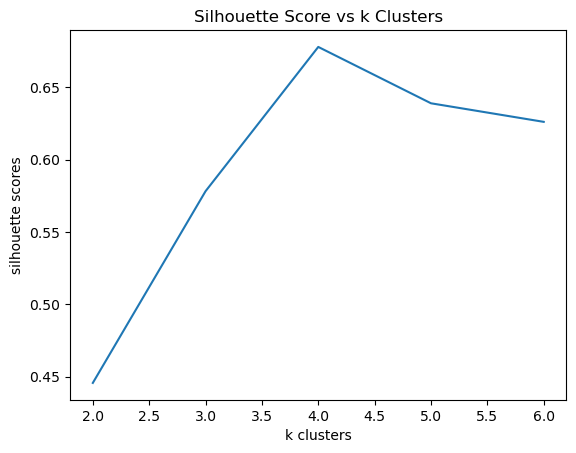

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df3 = pd.read_csv('lab03_dataset_3.csv')
dataset3 = np.array(df3)

# Store the silhouette scores
silhouette_s = []
for k in range(2,7):
    # Get the labels for the samples
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df3)
    # Get the silhouette score
    s_score = silhouette_score(df3, labels)
    print("Silhouette score:", s_score)
    silhouette_s.append(s_score)
    # Print the data in scatterplot with silhouette score and labeled axes
    for i in range(k):
        # Print the scatter plot corresponding to the first and second columns of data
        plt.scatter(dataset3[labels == i, 0], dataset3[labels == i, 1])
    # Label and print the scatterplot
    plt.title(f"Clusters: {k}")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()


# Make the silhouette score a line plot


# Plot the silhouette scores to the corresponding k value
x = [2,3,4,5,6]
plt.plot(x, silhouette_s)
plt.title("Silhouette Score vs k Clusters")
plt.xlabel("k clusters")
plt.ylabel("silhouette scores")
plt.show()

### 3.b (6 marks)

Repeat `3.a` but instead use sklearn's `GaussianMixture` model for learning.

Silhouette score: 0.4457081162143957


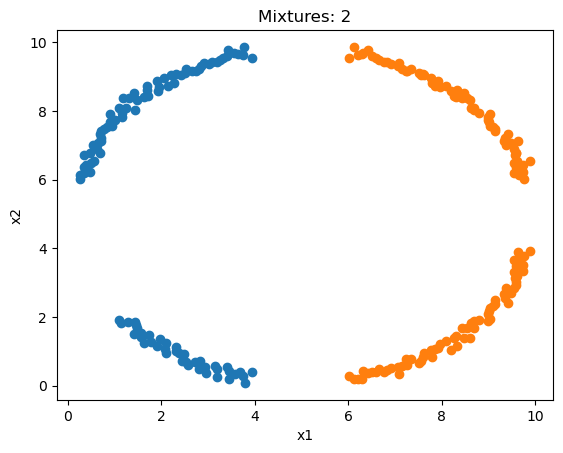

Silhouette score: 0.5840666810191436


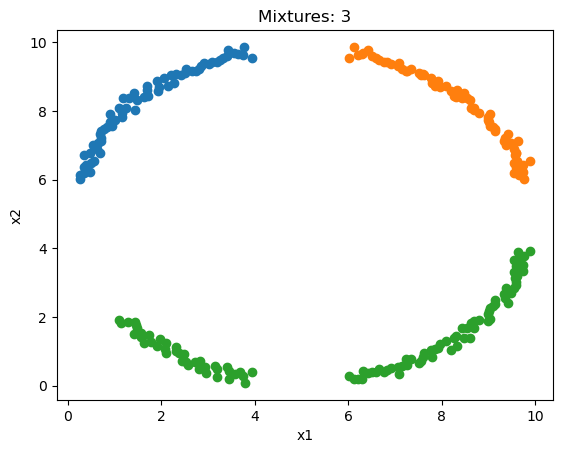

Silhouette score: 0.6778975743295703


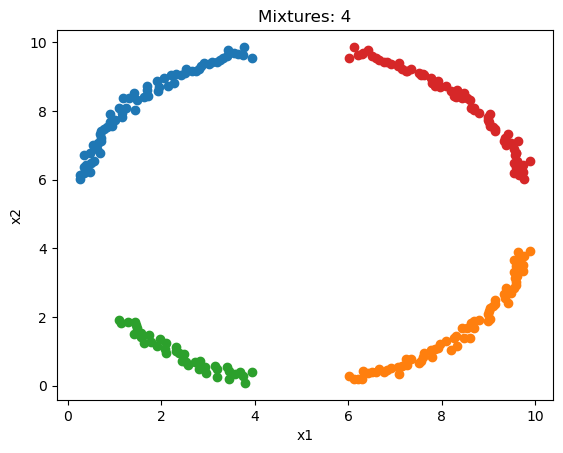

Silhouette score: 0.6393606858755352


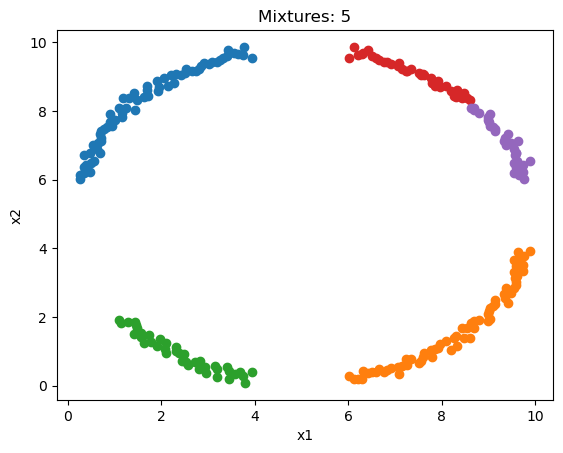

Silhouette score: 0.6235329489199429


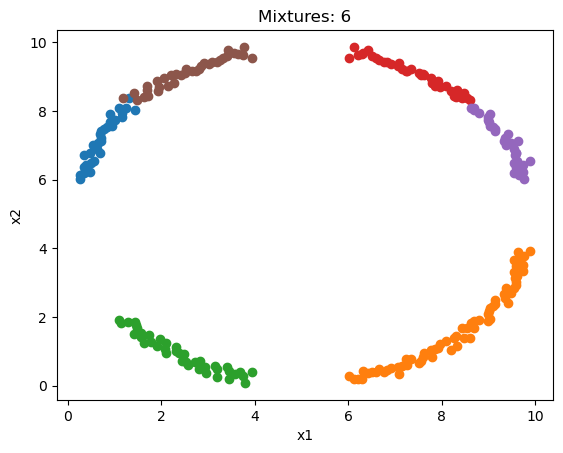

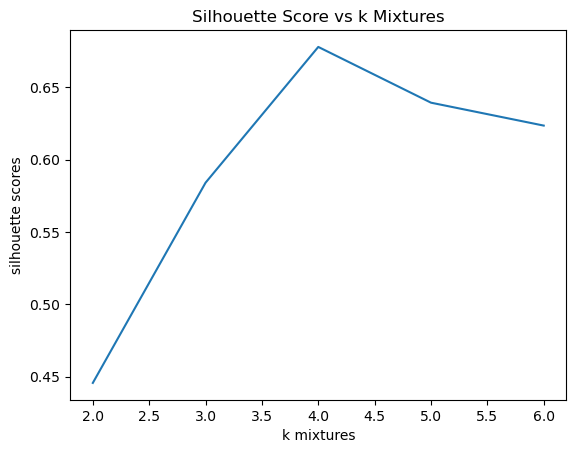

In [26]:
from sklearn.mixture import GaussianMixture

silhouette_s = []
for k in range(2, 7):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(df3)
    s_score = silhouette_score(df3, gmm_labels)
    print("Silhouette score:", s_score)
    silhouette_s.append(s_score)
    for i in range(k):
        plt.scatter(dataset3[gmm_labels == i, 0], dataset3[gmm_labels == i, 1])
    plt.title(f"Mixtures: {k}")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

plt.plot(x, silhouette_s)
plt.title('Silhouette Score vs k Mixtures')
plt.xlabel('k mixtures')
plt.ylabel('silhouette scores')
plt.show()
    

### 3.c (6 marks)

Using `lab03_dataset_4.csv`, apply sklearn's `AgglomerativeClustering` on the two-dimensional data and output the resulting clusters using a scatterplot. You will apply `AgglomerativeClustering` over several clusters ranging from cluster-count `K = 2 to 6`. Make sure your scatterplot uses `K colors` to clearly distinguish the data points belonging in their respective `K clusters`. Also, compute the `Silhouette score` for each of those `K clusters` and plot the `Silhouette score` against `K clusters`. Label the plot axes accordingly.

Silhouette score: 0.30158272765459865


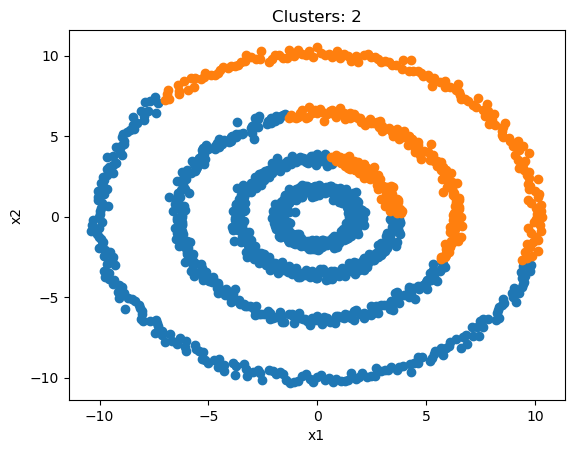

Silhouette score: 0.27706232071396253


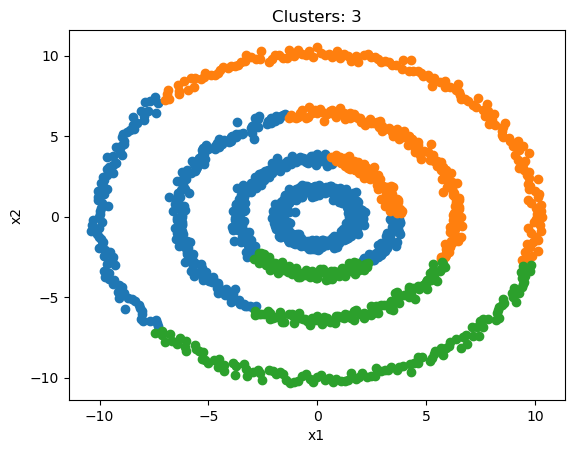

Silhouette score: 0.24305707266855517


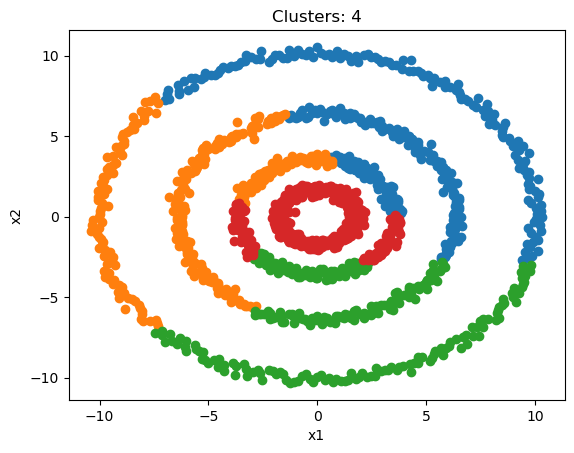

Silhouette score: 0.26891921138709174


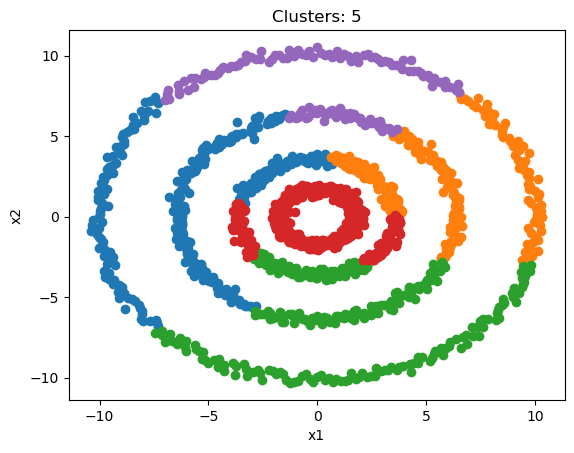

Silhouette score: 0.28057816732039936


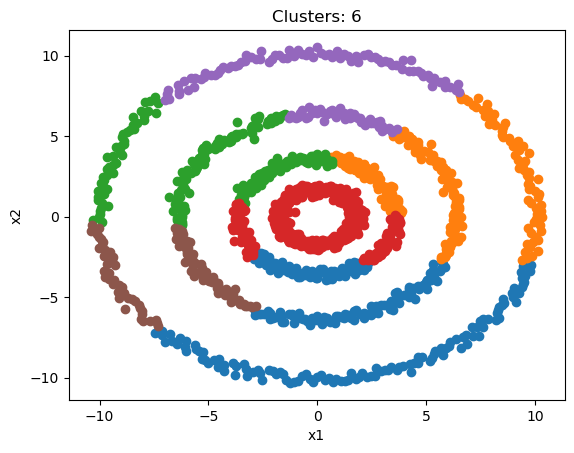

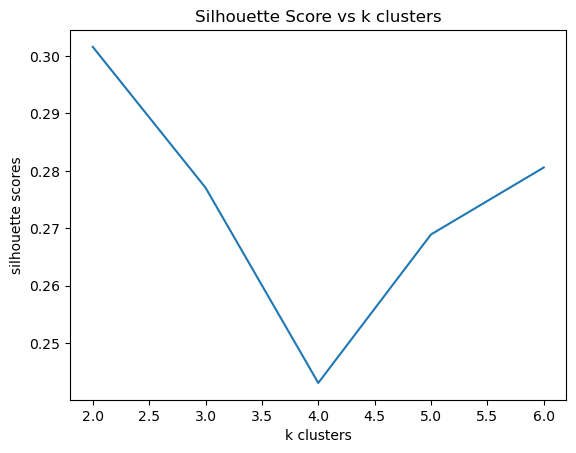

In [28]:
from sklearn.cluster import AgglomerativeClustering

df4 = pd.read_csv('lab03_dataset_4.csv')
dataset_4 = np.array(df4)

silhouette_s = []
for k in range(2, 7):
    agg = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg.fit_predict(df4)
    s_score = silhouette_score(df4, agg_labels)
    silhouette_s.append(s_score)
    print("Silhouette score:", s_score)
    for i in range(k):
        plt.scatter(dataset_4[agg_labels == i, 1], dataset_4[agg_labels == i, 2])
    plt.title(f"Clusters: {k}")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

plt.plot(x, silhouette_s)
plt.title('Silhouette Score vs k clusters')
plt.xlabel('k clusters')
plt.ylabel('silhouette scores')
plt.show()

### 3.d (6 marks)

Repeat `3.c` but instead use sklearn's `SpectralClustering` model for learning.

Silhouette score: 0.32094507017215645


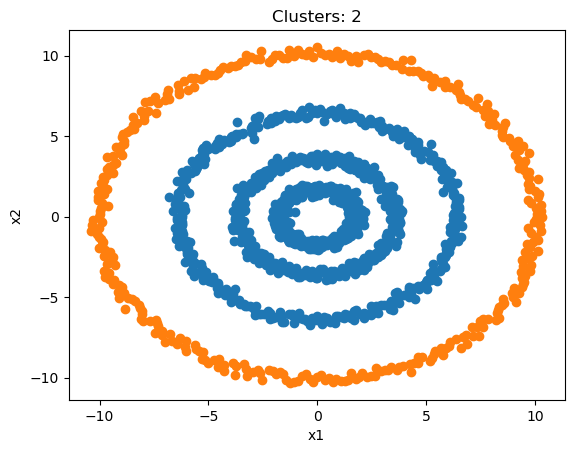

Silhouette score: 0.1496909473310304


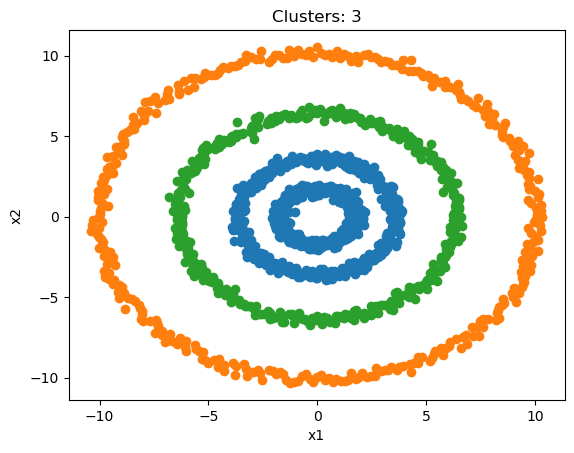

Silhouette score: 0.22322341636752607


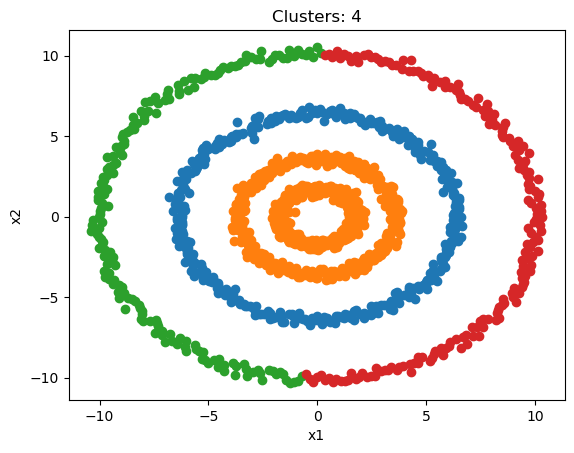

Silhouette score: 0.2720172401826052


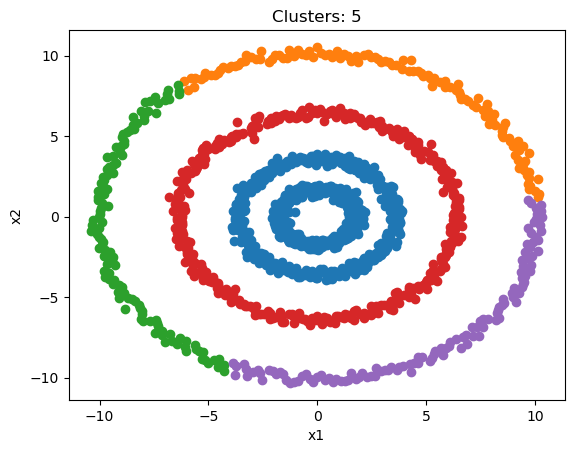

Silhouette score: 0.2552006667049422


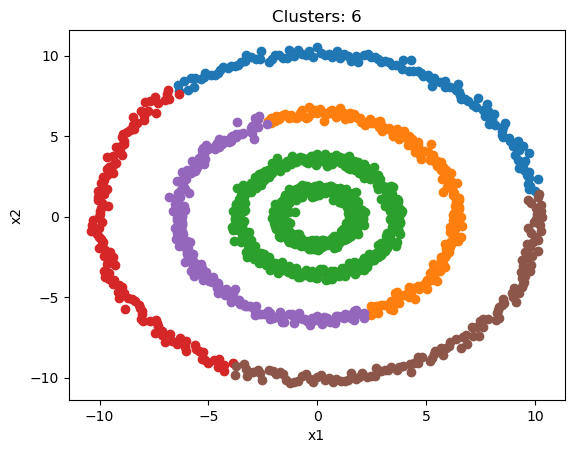

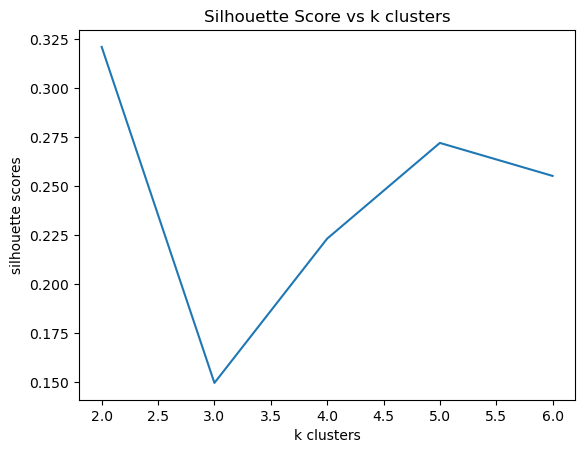

In [30]:
from sklearn.cluster import SpectralClustering

silhouette_s = []
for k in range(2, 7):
    clustering = SpectralClustering(n_clusters=k)
    cluster_labels = clustering.fit_predict(df4)
    s_score = silhouette_score(df4, cluster_labels)
    silhouette_s.append(s_score)
    print("Silhouette score:", s_score)
    for i in range(k):
        plt.scatter(dataset_4[cluster_labels == i, 1], dataset_4[cluster_labels == i, 2])
    plt.title(f"Clusters: {k}")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

plt.plot(x, silhouette_s)
plt.title('Silhouette Score vs k clusters')
plt.xlabel('k clusters')
plt.ylabel('silhouette scores')
plt.show()

### 3.e (6 marks)

The dataset `lab03_dataset_4.csv` generates 4 concentric rings, so ideally we would want 4 clusters representing the 4 concentric rings. Did the clustering attempts in `3.c` and `3.d` lead to 4 concentric ring clusters. Explore some other sklearn clustering algorithms to see which one can actually produce 4 clusters corresponding with the 4 concentric rings and display it.

The two models above did not generate 4 concentric ring clusters. However, spectral clustering was close.
HDBSCAN can produce 4 concentric ring clusters with a very low silhouette score containing missclassified and possibly overlapping clusters.
Silhouette score: -0.01237719260474959


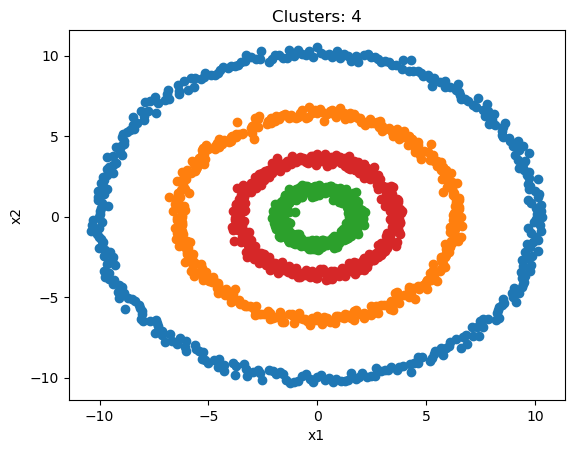

In [32]:
print("The two models above did not generate 4 concentric ring clusters. However, spectral clustering was close.")
print("HDBSCAN can produce 4 concentric ring clusters with a very low silhouette score containing missclassified and possibly overlapping clusters.")

from sklearn.cluster import HDBSCAN

cluster = HDBSCAN(min_cluster_size=10).fit(df4)
cluster_labels = cluster.labels_
s_score = silhouette_score(df4, cluster_labels)
print("Silhouette score:", s_score)
for i in range(4):
    plt.scatter(dataset_4[cluster_labels == i, 1], dataset_4[cluster_labels == i, 2])
plt.title(f"Clusters: {4}")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


### Problem 4: MLP Classification (20 marks)

`lab03_dataset_5.csv` contains 103,904 observations on airlines customer reviews. For this classification task, use the sklearn's `MLPClassifier` method, where the output class is the `Satisfaction` column which has a binary value of `Satisfied` or `Unsatisfied` and the remaining columns are the input features.

### 4.a (5 marks)

1. Drop any rows with missing values.
2. Output the new length of the final training dataset.
3. Apply encoding to convert all categorical features into numerical values.
4. Normalize the input features.
5. Apply a train-test split of 70-30.

In [87]:
from sklearn.preprocessing import OrdinalEncoder

df5 = pd.read_csv('lab03_dataset_5.csv')

# Drop rows with missing values
df5 = df5.dropna()
# Output the new length
print("New length:", len(df5))

# convert the categorical values to numerical
enc = OrdinalEncoder().set_output(transform='pandas')
df5 = enc.fit_transform(df5)

# Normalize input features
part_df5 = df5.loc[:,df5.columns != 'Satisfaction']
df5_scaled = StandardScaler().fit_transform(part_df5)
df5_scaled = pd.DataFrame(df5_scaled)
df5_scaled.columns = ['Age', 'Distance', 'InflightWifi', 'ConvenientTime', 'OnlineBooking',
       'GateLocation', 'FoodDrink', 'OnlineBoarding', 'SeatComfort',
       'InflightEntertainment', 'OnboardService', 'LegRoom', 'Baggage',
       'CheckinService', 'InflightService', 'Cleanliness', 'DepartureDelay',
       'ArrivalDelay', 'Gender', 'Customer', 'TravelType', 'Class']
df5_scaled = pd.concat([df5_scaled, df5['Satisfaction']], axis=1)

df5_scaled = df5.dropna()

# Split the data and apply train-test split
X = df5_scaled[['Age', 'Distance', 'InflightWifi', 'ConvenientTime', 'OnlineBooking',
       'GateLocation', 'FoodDrink', 'OnlineBoarding', 'SeatComfort',
       'InflightEntertainment', 'OnboardService', 'LegRoom', 'Baggage',
       'CheckinService', 'InflightService', 'Cleanliness', 'DepartureDelay',
       'ArrivalDelay', 'Gender', 'Customer', 'TravelType', 'Class']]
y = df5_scaled['Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

New length: 103594


### 4.b (5 marks)

Build a `MLPClassifier` neural network with 3 hidden layers, with 10 neurons in each of those layers, and using the `ReLU` activation function. Output the `mean squared error` between the test cases and the neural network predictions.

In [89]:
from sklearn.neural_network import MLPClassifier

mlp_relu = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500, activation='relu').fit(X_train, y_train)
y_pred = mlp_relu.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MLP Classifier mean squared error w/ ReLU:', mse)

MLP Classifier mean squared error w/ ReLU: 0.06850284758196853


### 4.c (5 marks)

Repeat all the tasks in 4.b while using the `tanh` activation function.

In [69]:
mlp_tan = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500, activation='tanh').fit(X_train, y_train)
y_pred = mlp_tan.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MLP Classifier mean squared error w/ tanh:', mse)

MLP Classifier mean squared error w/ tanh: 0.11013867885067087


### 4.d (5 marks)

Plot the training loss trajectory together for both the neural network models generated above using two different activation functions. Make sure to add legends and labels to your plot.

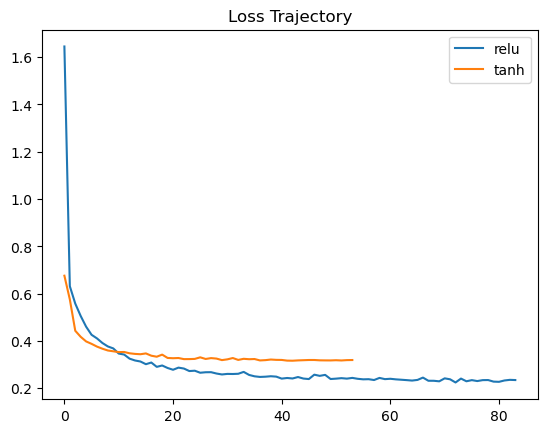

In [41]:
loss_relu = mlp_relu.loss_curve_
loss_tanh = mlp_tan.loss_curve_
plt.title("Loss Trajectory")
plt.plot(loss_relu, label='relu')
plt.plot(loss_tanh, label='tanh')
plt.legend()
plt.show()

### Problem 5: MLP Regression (20 marks)

`lab03_dataset_6.csv` contains 973 observations on gym data. For this prediction task, use the sklearn's `MLPRegressor` method, where the real-valued output feature is the `BMI` column and the remaining columns are the input features.

### 5.a (5 marks)

1. Drop any rows with missing values.
2. Output the new length of the final training dataset.
3. Apply encoding to convert all categorical features into numerical values.
4. Normalize the input features.
5. Apply a train-test split of 80-20.

In [44]:
from sklearn.preprocessing import OneHotEncoder

df6 = pd.read_csv('lab03_dataset_6.csv')

# Drop missing values
df6 = df6.dropna()
# Output the length of dataset
print("Length:", len(df6))

# Apply encoding
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
enc_categorical = enc.fit_transform(df6[['Gender', 'Workout_Type']])
df6 = pd.concat([df6, enc_categorical], axis=1).drop(columns=['Gender', 'Workout_Type'])

# Apply normalization
scaler = StandardScaler().fit(df6)
df6_scaled = pd.DataFrame(scaler.transform(df6))
df6_scaled.columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Gender_Female', 'Gender_Male',
       'Workout_Type_Cardio', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga']

# Split the data input and output
X = df6_scaled[['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'Gender_Female', 'Gender_Male',
       'Workout_Type_Cardio', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga']].to_numpy()
y = df6_scaled[['BMI']].to_numpy()

# Split the data training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

Length: 973


### 5.b (5 marks)

Build a `MLPRegressor` neural network with 3 hidden layers, with 10 neurons in each of those layers, and using the `tanh` activation function. Output the `mean squared error` between the test cases and the neural network predictions.

In [46]:
from sklearn.neural_network import MLPRegressor

mlp_r_tan = MLPRegressor(hidden_layer_sizes=(10,10,10), activation='tanh', max_iter=400, random_state=42).fit(X_train, y_train.ravel())
y_pred = mlp_r_tan.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MLP Regressor mean squared error w/ tanh:", mse)

MLP Regressor mean squared error w/ tanh: 0.01467806268826443


### 5.c (5 marks)

Repeat all the tasks in 5.b while using the `sigmoid` activation function.

In [48]:
mlp_r_sig = MLPRegressor(hidden_layer_sizes=(10,10,10), activation='logistic', max_iter=400, random_state=42).fit(X_train, y_train.ravel())
y_pred = mlp_r_sig.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MLP Regressor mean squared error w/ sigmoid:", mse)

MLP Regressor mean squared error w/ sigmoid: 0.017009746385759163


### 5.d (5 marks)

Plot the training loss trajectory together for both the neural network models generated above using two different activation functions. Make sure to add legends and labels to your plot.

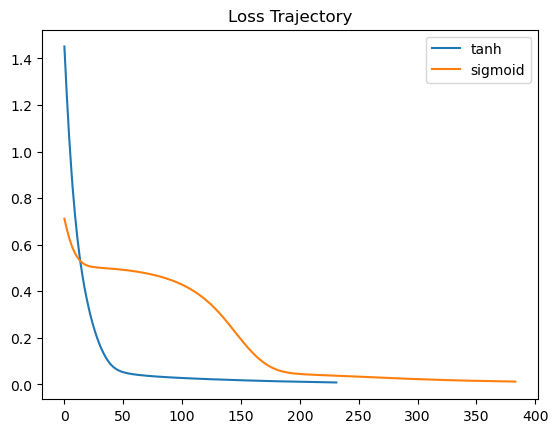

In [50]:
loss_tan = mlp_r_tan.loss_curve_
loss_sig = mlp_r_sig.loss_curve_
plt.title("Loss Trajectory")
plt.plot(loss_tan, label='tanh')
plt.plot(loss_sig, label='sigmoid')
plt.legend()
plt.show()